In [1]:
import tensorflow as tf
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext watermark

C:\Users\Nupur\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%watermark -v -m -p numpy,tensorflow,sklearn,matplotlib,torch

CPython 3.6.5
IPython 6.4.0

numpy 1.15.4
tensorflow 1.8.0
sklearn 0.19.1
matplotlib 3.0.2
torch 0.4.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


#### set up data

In [3]:
n = 300

In [4]:
x = (2*np.random.random(n) - 1)*math.pi

In [5]:
y = np.sin(x)

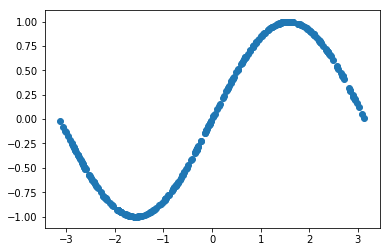

In [6]:
plt.scatter(x,y)

In [7]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.33)

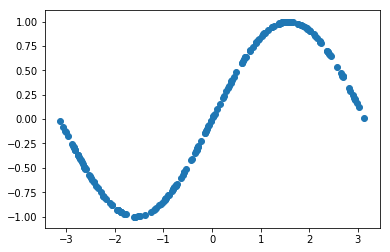

In [8]:
plt.scatter(xtrain, ytrain)

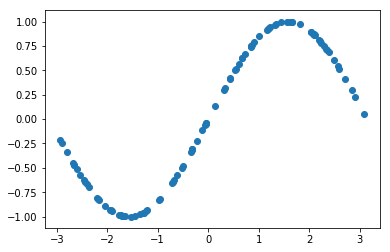

In [9]:
plt.scatter(xvalid, yvalid)

#### tensor flow graph

In [10]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 1], name='input')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='output')

In [11]:
hidden_layers = 10
weights_hidden = tf.get_variable('w_h', [1, hidden_layers], initializer=tf.constant_initializer(0.))
bias_hidden = tf.get_variable('b_h', [1, hidden_layers], initializer=tf.constant_initializer(0.))
f_hidden_out = tf.nn.sigmoid(tf.matmul(X, weights_hidden) + bias_hidden)

weights_out = tf.get_variable('w_o', [hidden_layers, 1], initializer=tf.constant_initializer(0.))
bias_out = tf.get_variable('b_o', [1, 1], initializer=tf.constant_initializer(0.))
out = tf.matmul(f_hidden_out, weights_out) + bias_out

#### optimizer

In [12]:
loss = tf.nn.l2_loss(out - Y)

learning_rate = 0.001
optim = tf.train.AdamOptimizer(learning_rate)
train_op = optim.minimize(loss)

#### train

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
mse = []
for epoch in range(500):
    _loss, _ = sess.run([loss, train_op], feed_dict={X:xtrain.reshape(-1,1), Y:ytrain.reshape(-1,1)})
    mse.append(_loss)

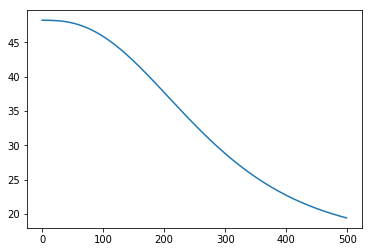

In [15]:
plt.plot(mse)

In [16]:
pred_y = sess.run(out, feed_dict={X:xvalid.reshape(-1,1)})

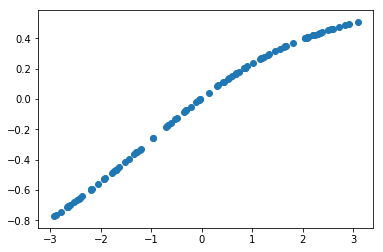

In [17]:
plt.scatter(xvalid, pred_y)

#### as above with pytorch

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as toptim

In [19]:
class UnivFunc(nn.Module):

    def __init__(self, num_hidden):
        super(UnivFunc, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(1, num_hidden)
        self.fc2 = nn.Linear(num_hidden, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
net = UnivFunc(10)

In [21]:
criterion = nn.MSELoss()
optimizer = toptim.Adam(net.parameters(), lr=0.001)

In [22]:
inputs = torch.from_numpy(xtrain.reshape(-1,1).astype(np.float32))

In [23]:
labels = torch.from_numpy(ytrain.reshape(-1,1).astype(np.float32))

In [24]:
pmse = []
for epoch in range(500):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    pmse.append(loss.item())

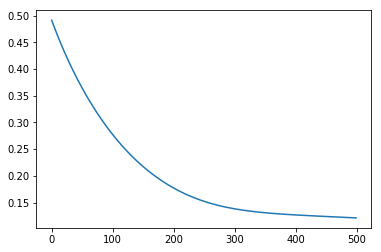

In [25]:
plt.plot(pmse)

In [26]:
pyvalid = net(torch.from_numpy(xvalid.reshape(-1,1).astype(np.float32)))

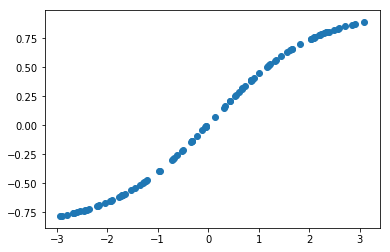

In [27]:
plt.scatter(xvalid, pyvalid.data.numpy())